# Sprint 機械学習スクラッチ SVM

## 1.このSprintについて

### Sprintの目的
スクラッチを通してSVMを理解する
線形モデルと異なる手法に触れる

### どのように学ぶか
スクラッチでSVMを実装した後、学習と検証を行なっていきます。

## 2.SVMスクラッチ

分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。

以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。

## 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 
λ
 を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。
 はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。

ここで xxxxx はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。

条件として、更新毎に xxxx を満たす必要があります。満たさない場合は xxxxとします。


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# シンプルデータセット１を作成

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
# ラベルは-1 or 1 しかない。
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

# X.shape:(500,2),y.shape(500,)[1][-1]

In [3]:
# データを標準化
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

# 訓練用データと検証用データに分割

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)
print(y_test)
print(X_test.shape)
print(y_test.shape)

(375, 2)
[[ 4.02167520e-01 -7.62160997e-01]
 [ 9.14520842e-01 -3.59129160e-01]
 [-2.07144508e-02 -1.55068982e+00]
 [ 9.51259416e-02 -1.49981287e+00]
 [-1.98845795e+00  3.48142760e-01]
 [ 1.05265520e+00 -3.77410096e-01]
 [ 9.50339157e-01 -1.09810107e+00]
 [ 2.32164590e-01 -1.29460202e+00]
 [ 2.47460055e-01 -8.10996145e-01]
 [-1.30954803e+00  3.80561827e-01]
 [-4.56789159e-01  1.50125626e+00]
 [ 5.72663097e-01 -1.02973160e+00]
 [ 1.15045558e+00 -4.49740998e-01]
 [ 6.15133610e-01 -9.15905888e-01]
 [ 1.20907380e+00 -4.77924422e-01]
 [-5.57642769e-01  1.30150953e+00]
 [ 2.02222035e-02  1.61472346e+00]
 [-1.81773544e-01  9.71513050e-01]
 [-1.20222203e+00  3.03000900e-01]
 [ 5.47740922e-01 -9.88164915e-01]
 [-2.05444988e+00 -3.99949728e-01]
 [ 5.91560336e-02 -1.14247280e+00]
 [-1.31129111e+00  3.17570501e-01]
 [-1.79342330e+00  1.75991043e-01]
 [-1.30384048e+00  3.67394090e-01]
 [-4.31053014e-01  1.05734222e+00]
 [-4.43152322e-01  1.46609621e+00]
 [-6.31791968e-01  1.04373146e+00]
 [ 8.894577

In [4]:
print("X_train.shape:{}".format(X_train.shape))
print("X_test.shape:{}".format(X_test.shape))
print("y_train.shape:{}".format(y_train.shape))
print("y_test.shape:{}".format(y_test.shape))
print("X_train.ndim:{}".format(X_train.ndim))
print("X_test.ndim:{}".format(X_test.ndim))
print("y_train.ndim:{}".format(y_train.ndim))
print("y_test.ndim:{}".format(y_test.ndim))

print(X_train)
print(X_test)
print(y_train)
print(y_test)

X_train.shape:(375, 2)
X_test.shape:(125, 2)
y_train.shape:(375,)
y_test.shape:(125,)
X_train.ndim:2
X_test.ndim:2
y_train.ndim:1
y_test.ndim:1
[[ 4.02167520e-01 -7.62160997e-01]
 [ 9.14520842e-01 -3.59129160e-01]
 [-2.07144508e-02 -1.55068982e+00]
 [ 9.51259416e-02 -1.49981287e+00]
 [-1.98845795e+00  3.48142760e-01]
 [ 1.05265520e+00 -3.77410096e-01]
 [ 9.50339157e-01 -1.09810107e+00]
 [ 2.32164590e-01 -1.29460202e+00]
 [ 2.47460055e-01 -8.10996145e-01]
 [-1.30954803e+00  3.80561827e-01]
 [-4.56789159e-01  1.50125626e+00]
 [ 5.72663097e-01 -1.02973160e+00]
 [ 1.15045558e+00 -4.49740998e-01]
 [ 6.15133610e-01 -9.15905888e-01]
 [ 1.20907380e+00 -4.77924422e-01]
 [-5.57642769e-01  1.30150953e+00]
 [ 2.02222035e-02  1.61472346e+00]
 [-1.81773544e-01  9.71513050e-01]
 [-1.20222203e+00  3.03000900e-01]
 [ 5.47740922e-01 -9.88164915e-01]
 [-2.05444988e+00 -3.99949728e-01]
 [ 5.91560336e-02 -1.14247280e+00]
 [-1.31129111e+00  3.17570501e-01]
 [-1.79342330e+00  1.75991043e-01]
 [-1.30384048e+0

## 【問題2】サポートベクターの決定
計算したラグランジュ乗数 λ が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。

閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

## 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた f(x)の符号が分類結果です。

In [5]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """

    def __init__(self, num_iter=5, lr=0.0001, threshold=1e-5, kernel='linear',  verbose=True):
        # ハイパーパラメータを属性として記録

        self.iter = num_iter
        self.lr = lr
        self.threshold = threshold
        self.verbose = verbose

    # 問１：線形カーネル k(xi, xj) = x,.T xj を求める関数
    def karnel(self, X, i, j):
        k = np.dot(X[i].T, X[j])
        return k

    # 問１：ラムダを算出
    def generating_lam(self, X, y, lam):

        lam_old = np.zeros(lam.shape) # 元のリストをコピーしてfor文で使う
        for i in range(len(X)):
#             sigma = 0
            sigma = np.array([0])
            #i = 0 # インデックスを０から始めないと、サイズ超のエラーが出る
            for j in range(len(X)):
                #j = 0
                sigma[0] += lam[j]*y[i]*y[j]*self.karnel(X, i, j)
            lam_old[i] = lam[i] + self.lr*(1 - sigma[0])
            if lam_old[i] < 0:
                lam_old[i] = 0
        lam = lam_old.copy()
        return lam
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #self.N = len(X)
        #self.y = y
        lam = np.ones(len(X))

         
        # 学習
        for t in range(self.iter):
            lam = self.generating_lam(X, y, lam)
            
            if self.verbose: #verboseをTrueにした際は学習過程を出力
                print("{}回目のλ\n{}".format(t, lam))
    
        # 問２：svを決定
        # しきい値より大きいサポートベクターの位置
        self.index = np.where(lam > self.threshold)# 
        self.sv_lam = lam[self.index] # λn
        self.sv_f = X[self.index] # サポートベクター
        self.sv_num = len(self.sv_f) # サポートベクターの数
        self.sv_label = y[self.index] # サポートベクターのラベル
        if self.verbose: #verboseをTrueにした際は学習過程を出力
            print("svの数：{}".format(self.sv_num))


    # 問３：推定
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        
        pre_k =  np.dot(X, self.sv_f.T) 
        self.sv_lam = np.array(self.sv_lam)
        self.sv_label = np.array(self.sv_label)
        f_X =  (self.sv_label*self.sv_lam)@pre_k.T
        f_X_result = np.sign(f_X)

        return f_X_result

### 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

### スクラッチしたSVMで推定

In [6]:
# X、yを使って学習と推定を行う
SSVM = ScratchSVMClassifier(num_iter=50, lr=0.01, threshold=1e-5, kernel='linear',  verbose=True)
fit_ss  = SSVM.fit(X_train, y_train)
pre_ss = SSVM.predict(X_test)
print("SVM の推定値：{}".format(pre_ss)) 
print("テストラベル値：{}".format(y_test))

0回目のλ
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.37 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.68 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.

5回目のλ
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.42 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.04 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.04 0.05 0.05 0.05 0.05
 0.73 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05


10回目のλ
[0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.09 0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.47 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.09 0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.07 0.1  0.1  0.1  0.1  0.1  0.09 0.1  0.1  0.1  0.1
 0.78 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.

15回目のλ
[0.15 0.15 0.15 0.15 0.13 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.14 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.52 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.11
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.13 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.12 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.14 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.04 0.15 0.15 0.15 0.15 0.15 0.14 0.15 0.15 0.15 0.15
 0.83 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.13 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15

20回目のλ
[0.2  0.2  0.2  0.2  0.08 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.19 0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.57 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.11
 0.2  0.2  0.19 0.2  0.2  0.2  0.2  0.2  0.13 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.12 0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.19 0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.18 0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.   0.2  0.2  0.2  0.2  0.2  0.19 0.2  0.2  0.2  0.2
 0.88 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.08 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.15 0.2
 0.2  0.2  0.2  0.2  0.13 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.18 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0

25回目のλ
[2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 3.46944695e-18 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.40000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 6.20000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 1.10000000e-01
 2.50000000e-01 2.50000000e-01 1.70000000e-01 2.50000000e-01
 2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01
 1.30000000e-01 2

28回目のλ
[0.28 0.28 0.28 0.28 0.   0.28 0.25 0.28 0.28 0.28 0.28 0.28 0.28 0.28
 0.28 0.28 0.28 0.28 0.28 0.28 0.27 0.28 0.28 0.28 0.28 0.28 0.28 0.28
 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28
 0.28 0.65 0.28 0.28 0.26 0.28 0.28 0.28 0.26 0.28 0.28 0.28 0.28 0.11
 0.28 0.28 0.06 0.28 0.28 0.28 0.28 0.28 0.13 0.28 0.28 0.28 0.28 0.28
 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.12 0.28 0.23 0.28 0.28
 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.2  0.28 0.24 0.28 0.27 0.28
 0.28 0.28 0.15 0.28 0.28 0.28 0.28 0.   0.28 0.28 0.28 0.28 0.28 0.28
 0.28 0.28 0.28 0.   0.28 0.21 0.28 0.28 0.28 0.26 0.28 0.28 0.28 0.2
 0.96 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28
 0.28 0.28 0.25 0.   0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28
 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.15 0.28
 0.28 0.28 0.28 0.28 0.13 0.28 0.28 0.28 0.28 0.28 0.28 0.28 0.23 0.28
 0.28 0.17 0.28 0.28 0.28 0.28 0.28 0.28 0.18 0.27 0.28 0.28 0.28 0.28


33回目のλ
[0.33 0.33 0.33 0.33 0.   0.33 0.25 0.33 0.33 0.33 0.33 0.33 0.33 0.33
 0.33 0.33 0.33 0.33 0.33 0.33 0.3  0.33 0.33 0.26 0.33 0.33 0.33 0.33
 0.33 0.31 0.31 0.33 0.33 0.33 0.33 0.33 0.23 0.33 0.28 0.33 0.33 0.33
 0.28 0.7  0.31 0.33 0.26 0.32 0.33 0.33 0.19 0.33 0.31 0.33 0.33 0.11
 0.33 0.33 0.   0.33 0.33 0.28 0.33 0.33 0.12 0.33 0.33 0.33 0.33 0.33
 0.33 0.33 0.21 0.33 0.33 0.33 0.33 0.33 0.33 0.12 0.33 0.23 0.33 0.33
 0.33 0.33 0.33 0.31 0.33 0.33 0.33 0.33 0.2  0.33 0.16 0.33 0.32 0.33
 0.33 0.33 0.   0.33 0.33 0.3  0.33 0.   0.33 0.33 0.33 0.33 0.15 0.33
 0.33 0.33 0.33 0.   0.3  0.21 0.33 0.33 0.33 0.11 0.32 0.32 0.33 0.2
 1.01 0.28 0.32 0.33 0.33 0.27 0.33 0.33 0.33 0.33 0.33 0.29 0.33 0.28
 0.33 0.33 0.25 0.   0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.33
 0.33 0.29 0.33 0.33 0.33 0.33 0.33 0.33 0.25 0.33 0.33 0.33 0.15 0.33
 0.33 0.33 0.33 0.33 0.13 0.33 0.33 0.33 0.29 0.33 0.33 0.33 0.23 0.33
 0.33 0.   0.33 0.33 0.3  0.33 0.31 0.33 0.18 0.27 0.33 0.33 0.33 0.33


36回目のλ
[3.60000000e-01 3.60000000e-01 3.60000000e-01 3.60000000e-01
 0.00000000e+00 3.60000000e-01 2.50000000e-01 3.60000000e-01
 3.60000000e-01 3.50000000e-01 3.60000000e-01 3.60000000e-01
 3.60000000e-01 3.60000000e-01 3.60000000e-01 3.50000000e-01
 3.60000000e-01 3.60000000e-01 3.60000000e-01 3.60000000e-01
 3.00000000e-01 3.60000000e-01 3.60000000e-01 3.00000000e-02
 3.50000000e-01 3.60000000e-01 3.60000000e-01 3.60000000e-01
 3.60000000e-01 3.10000000e-01 3.30000000e-01 3.60000000e-01
 3.60000000e-01 3.60000000e-01 3.60000000e-01 3.60000000e-01
 2.00000000e-01 3.60000000e-01 2.80000000e-01 3.60000000e-01
 3.60000000e-01 3.60000000e-01 2.80000000e-01 7.30000000e-01
 3.40000000e-01 3.60000000e-01 2.60000000e-01 2.80000000e-01
 3.60000000e-01 2.90000000e-01 0.00000000e+00 3.40000000e-01
 3.30000000e-01 3.60000000e-01 3.60000000e-01 1.10000000e-01
 3.60000000e-01 3.60000000e-01 0.00000000e+00 3.60000000e-01
 3.60000000e-01 2.50000000e-01 3.60000000e-01 3.60000000e-01
 1.20000000e-01 3

39回目のλ
[0.39 0.39 0.39 0.39 0.   0.39 0.25 0.39 0.39 0.35 0.39 0.39 0.39 0.39
 0.39 0.35 0.39 0.39 0.39 0.39 0.3  0.39 0.39 0.   0.35 0.39 0.39 0.39
 0.39 0.31 0.25 0.39 0.39 0.39 0.39 0.39 0.14 0.39 0.26 0.39 0.39 0.39
 0.28 0.76 0.34 0.39 0.26 0.11 0.39 0.19 0.   0.34 0.26 0.39 0.39 0.11
 0.39 0.39 0.   0.39 0.39 0.14 0.38 0.39 0.   0.39 0.35 0.39 0.39 0.39
 0.39 0.39 0.   0.26 0.39 0.39 0.39 0.39 0.39 0.12 0.37 0.23 0.39 0.39
 0.39 0.39 0.39 0.31 0.37 0.39 0.39 0.39 0.2  0.39 0.   0.39 0.35 0.39
 0.39 0.39 0.   0.34 0.38 0.3  0.39 0.   0.39 0.35 0.39 0.39 0.   0.39
 0.39 0.39 0.39 0.   0.3  0.21 0.39 0.39 0.39 0.   0.32 0.32 0.39 0.2
 1.07 0.18 0.32 0.39 0.39 0.12 0.39 0.39 0.39 0.39 0.39 0.   0.39 0.
 0.37 0.39 0.25 0.   0.39 0.37 0.39 0.39 0.39 0.38 0.39 0.39 0.38 0.39
 0.38 0.29 0.39 0.39 0.39 0.39 0.39 0.39 0.   0.3  0.39 0.39 0.15 0.39
 0.39 0.39 0.39 0.38 0.13 0.39 0.39 0.39 0.29 0.39 0.39 0.39 0.23 0.39
 0.39 0.   0.39 0.39 0.3  0.39 0.31 0.39 0.18 0.27 0.39 0.39 0.39 0.39
 0

42回目のλ
[0.42 0.42 0.42 0.37 0.   0.42 0.25 0.42 0.42 0.35 0.39 0.42 0.42 0.42
 0.42 0.35 0.4  0.42 0.42 0.42 0.29 0.42 0.42 0.   0.35 0.42 0.41 0.42
 0.42 0.31 0.13 0.41 0.42 0.42 0.42 0.42 0.07 0.42 0.23 0.42 0.39 0.42
 0.28 0.79 0.13 0.42 0.26 0.   0.42 0.   0.   0.24 0.17 0.42 0.42 0.1
 0.42 0.42 0.   0.42 0.42 0.   0.37 0.42 0.   0.42 0.35 0.42 0.42 0.42
 0.42 0.42 0.   0.13 0.42 0.42 0.42 0.42 0.42 0.12 0.37 0.23 0.42 0.42
 0.42 0.42 0.42 0.31 0.22 0.42 0.39 0.42 0.2  0.42 0.   0.42 0.38 0.42
 0.42 0.42 0.   0.32 0.35 0.3  0.42 0.   0.42 0.35 0.42 0.42 0.   0.42
 0.42 0.42 0.41 0.   0.3  0.21 0.42 0.42 0.42 0.   0.28 0.32 0.42 0.2
 1.1  0.   0.32 0.42 0.4  0.   0.42 0.42 0.42 0.42 0.42 0.   0.41 0.
 0.25 0.42 0.25 0.   0.42 0.37 0.42 0.42 0.42 0.38 0.42 0.42 0.38 0.42
 0.41 0.29 0.42 0.42 0.42 0.42 0.42 0.42 0.   0.27 0.42 0.42 0.11 0.42
 0.42 0.42 0.42 0.38 0.13 0.42 0.42 0.42 0.29 0.42 0.42 0.42 0.23 0.42
 0.42 0.   0.42 0.4  0.3  0.42 0.24 0.42 0.18 0.27 0.42 0.42 0.42 0.42
 0.

45回目のλ
[0.45 0.45 0.44 0.34 0.   0.45 0.25 0.45 0.45 0.34 0.36 0.45 0.45 0.45
 0.45 0.35 0.37 0.45 0.45 0.45 0.23 0.45 0.44 0.   0.35 0.45 0.38 0.45
 0.45 0.31 0.   0.41 0.42 0.45 0.45 0.45 0.   0.45 0.13 0.45 0.39 0.45
 0.28 0.82 0.   0.45 0.26 0.   0.45 0.   0.   0.13 0.   0.45 0.43 0.09
 0.45 0.45 0.   0.45 0.45 0.   0.34 0.45 0.   0.45 0.34 0.45 0.45 0.45
 0.45 0.45 0.   0.03 0.45 0.45 0.45 0.45 0.45 0.12 0.37 0.23 0.45 0.45
 0.45 0.45 0.45 0.31 0.   0.45 0.39 0.45 0.2  0.45 0.   0.45 0.41 0.45
 0.45 0.45 0.   0.18 0.32 0.3  0.45 0.   0.45 0.35 0.45 0.45 0.   0.45
 0.45 0.45 0.41 0.   0.3  0.21 0.45 0.45 0.45 0.   0.1  0.32 0.45 0.2
 1.13 0.   0.32 0.45 0.4  0.   0.45 0.45 0.45 0.45 0.45 0.   0.41 0.
 0.1  0.45 0.25 0.   0.45 0.37 0.45 0.45 0.45 0.38 0.45 0.45 0.35 0.45
 0.44 0.29 0.45 0.45 0.45 0.45 0.45 0.45 0.   0.22 0.45 0.45 0.04 0.45
 0.45 0.45 0.44 0.35 0.13 0.45 0.45 0.45 0.29 0.45 0.45 0.45 0.21 0.45
 0.41 0.   0.45 0.4  0.3  0.45 0.11 0.45 0.18 0.27 0.45 0.42 0.45 0.45
 0

48回目のλ
[0.48 0.48 0.44 0.32 0.   0.48 0.25 0.48 0.48 0.29 0.19 0.48 0.48 0.48
 0.45 0.35 0.31 0.48 0.48 0.48 0.07 0.48 0.41 0.   0.3  0.48 0.36 0.48
 0.48 0.31 0.   0.41 0.42 0.48 0.48 0.45 0.   0.48 0.   0.48 0.39 0.48
 0.28 0.85 0.   0.48 0.26 0.   0.48 0.   0.   0.   0.   0.48 0.43 0.
 0.48 0.48 0.   0.48 0.48 0.   0.28 0.48 0.   0.48 0.28 0.48 0.48 0.48
 0.48 0.45 0.   0.   0.48 0.48 0.47 0.48 0.48 0.09 0.37 0.23 0.46 0.48
 0.48 0.48 0.48 0.31 0.   0.45 0.39 0.48 0.15 0.48 0.   0.48 0.44 0.48
 0.48 0.46 0.   0.   0.26 0.3  0.48 0.   0.48 0.35 0.47 0.48 0.   0.48
 0.48 0.48 0.41 0.   0.3  0.21 0.45 0.48 0.48 0.   0.   0.32 0.48 0.2
 1.16 0.   0.32 0.48 0.35 0.   0.47 0.48 0.48 0.48 0.48 0.   0.41 0.
 0.   0.48 0.25 0.   0.48 0.34 0.48 0.48 0.48 0.38 0.48 0.48 0.21 0.48
 0.43 0.29 0.48 0.48 0.48 0.48 0.48 0.48 0.   0.13 0.46 0.48 0.   0.48
 0.45 0.48 0.44 0.3  0.13 0.48 0.48 0.48 0.29 0.48 0.48 0.48 0.09 0.48
 0.3  0.   0.48 0.4  0.3  0.48 0.   0.48 0.18 0.27 0.47 0.45 0.48 0.48
 0. 

In [7]:
# 評価
print("正解率 ：{}".format(accuracy_score(y_test, pre_ss)))
print("精度    ：{}".format(precision_score(y_test, pre_ss)))
print("検出率：{}".format(recall_score(y_test, pre_ss)))
print("F値     ：{}".format(f1_score(y_test, pre_ss)))
#print("混合行列：\n{}".format(confusion_matrix(labels_test, svm_pred)))

正解率 ：1.0
精度    ：1.0
検出率：1.0
F値     ：1.0


## skleanのSVMで推定

In [8]:
# scikit-learnによる実装と比較(AccuracyやPrecision、Recallなどの指標値で評価）

# SVMで学習、推定
svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("SVM の推定値：{}".format(svm_pred)) 
print("テストラベル値：{}".format(y_test))
print(svm_pred.shape)

# 評価
print("正解率 ：{}".format(accuracy_score(y_test, svm_pred)))
print("精度    ：{}".format(precision_score(y_test, svm_pred)))
print("検出率：{}".format(recall_score(y_test, svm_pred)))
print("F値     ：{}".format(f1_score(y_test, svm_pred)))
#print("混合行列：\n{}".format(confusion_matrix(labels_test, svm_pred)))

SVM の推定値：[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.]
テストラベル値：[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1. 

### 【問題5】決定領域の可視化
決定領域を可視化してください。 以下の例のようにサポートベクターは異なる色で示してください。

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1','sv']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue','orange']
    contourf_color = ['pink', 'skyblue']
    n_class = 3
    #sv_f = SSVM.sv_f

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.sv_f[:, 0], model.sv_f[:, 1], s=80, color=scatter_color[2], label="SV", marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

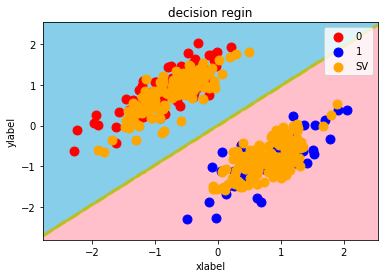

In [10]:
# スクラッチしたsvm
# たくさんサポートベクトルが取れてる。。
decision_region(X_test, y_test, SSVM, step=0.01, title='decision regin', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1','sv'])

In [11]:
# サイキットラーンで実行した
# decision_region(X_test, y_test, svm, step=0.01, title='decision regin', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1','sv'])

### 【問題6】（アドバンス課題）多項式カーネル関数の作成